<a href="https://colab.research.google.com/github/thomaziogiacobbe/cnc/blob/main/Relatorio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Relatório 3 - Interpolação

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

###Lagrange

In [ ]:
def lagrange(x, y, z):
    pz = 0
    m = len(x)

    for i in range(m):
        c, d = 1, 1
        for j in range(m):
            if i != j:
                c *= (z - x[j])
                d *= (x[i] - x[j])
        pz += y[i] * c/d
    return pz

###Newton

In [ ]:
def newton(x, y, z):
    m = len(x)
    dely = y.copy()

    for i in range(1, m - 1):
        for k in range(m - 1, i, -1):
            dely[k] = (dely[k] - dely[k - 1])/(x[k] - x[k - i])

    pz = dely[0]
    for i in range(1, m - 1):
        termo = dely[i]
        for j in range(0, i - 1):
            termo = termo * (x[j] - x[j - 1])
        pz = pz * termo

    return pz

###MMQ

In [ ]:
def mmq(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    sum_x2 = sum(xi**2 for xi in x)

    xm = sum_x/n
    ym = sum_y/n
    a1 = (n*sum_xy - sum_x*sum_y) / (n*sum_x2 - sum_x*sum_x)
    a0 = ym - a1*xm

    st,sr = 0,0
    for i in range(n):
        st += (y[i] - ym)**2
        sr += (y[i] - a1*x[i] - a0)**2

    syx = (sr/(n-2))**0.5
    r2 = (st - sr)/st
    return syx, r2, a1, a0

In [ ]:
def mmq_qua(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x2 = sum(xi**2 for xi in x)
    sum_x2n = (sum_x * sum_x)  /n
    sxx = sum_x2 - sum_x2n

    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    sum_xyn = (sum_x * sum_y) /n
    sxy = sum_xy - sum_xyn

    sum_x3 = sum(xi**3 for xi in x)
    sum_xx2n = (sum_x * sum_x2) / n
    sxx2 = sum_x3 - sum_xx2n

    sum_x2y = sum((xi ** 2) * yi for xi, yi in zip(x, y))
    sum_x2yn = (sum_x2 * sum_y) / n
    sx2y = sum_x2y - sum_x2yn

    sum_x4 = sum(xi**4 for xi in x)
    sum_x22n = (sum_x2 ** 2) / n
    sx2x2 = sum_x4 - sum_x22n

    A = ((sx2y * sxx) - (sxy * sxx2)) / ((sxx * sx2x2) - ((sxx2)**2))
    B = ((sxy * sx2x2) - (sx2y * sxx2)) / ((sxx * sx2x2) - ((sxx2)**2))
    C = (sum_y / n) - (B * (sum_x / n)) - (A * (sum_x2 / n))

    return A, B, C

In [ ]:
def bqua(x, a, b, c):
  return a * (x ** 2) +  (b * x) + c

In [ ]:
def mmq_exp(x, y):
    sum_x = sum(x)
    sum_x2 = sum(xi**2 for xi in x)
    A = [[len(x), sum_x], [sum_x, sum_x2]]
    y_ = [math.log(yi) for yi in y]
    sum_xy = sum(xi * yi for xi, yi in zip(x, y_))
    B = [sum(y_), sum_xy]
    a0, a1 = np.linalg.solve(A,B)
    a, b = math.exp(a0), a1
    return a, b

In [ ]:
def bexp(x, a, b):
  return a * math.exp(b * x)

###Spline

In [ ]:
def spline(x, y, n):
  h = [0] * (n+1)
  a = [0] * (n+1)

  for i in range(n):
    h[i] = (x[i+1] - x[i])

  for i in range(1, n):
    a[i] = ((3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1]))

  l = [0] * (n+1)
  l[0] = 1
  u = [0] * (n+1)
  z = [0] * (n+1)

  for i in range(1, n):
    l[i] = ((2*(x[i+1]-x[i-1])) - (h[i-1] * u[i-1]))
    u[i] = h[i]/l[i]
    z[i] = ((a[i] - (h[i-1] * z[i-1]))/l[i])

  l[n] = 1
  z[n] = 0
  b  = [0] * (n+1)
  d =  [0] * (n+1)
  c =  [0] * (n+1)
  c[n] = 0
  for i in range(n-1, -1, -1):
    c[i] = (z[i] - (u[i]*c[i+1]))
    b[i] = ((((y[i+1]-y[i])/h[i]) - ((h[i]*(c[i+1]+2*c[i]))/3)))
    d[i] = (((c[i+1]-c[i])/(3*h[i])))

  s = []

  for i in range(n):
    print(f'S{i+1} = {round(d[i], 6)}*(x - {x[i]})³ + {round(c[i], 6)}*(x - {x[i]})² + {round(b[i], 6)}*(x - {x[i]}) + {y[i]}')
    s.append(lambda w, j=i: d[j]*((w-x[j])**3) + c[j]*((w-x[j])**2) + b[j]*(w-x[j]) + y[j])

  return s

##Relatorio

###1

In [ ]:
x = [0.75, 1.25]
y = [-0.6, 0.79]
z = 1.15

print(lagrange(x, y, z))

0.5119999999999998


###2

####a

In [ ]:
x = [24, 32]
y = [8.418, 7.305]
z = 7.986

print(lagrange(x, y, z))

10.64594775


In [ ]:
x = [0, 8, 16, 24, 32, 40]
y = [14.621, 11.843, 9.870, 8.418, 7.305, 6.413]
z = 7.986

print(lagrange(x, y, z))

11.8470573067661


In [ ]:
x = [0, 8, 16, 24, 32, 40]
y = [14.621, 11.843, 9.870, 8.418, 7.305, 6.413]
s = spline(x, y, 4)
print(f'Spline: {round((s[3](27)),3)} mg/L')

S1 = 0.00036*(x - 0)³ + 0.0*(x - 0)² + -0.370308*(x - 0) + 14.621
S2 = -0.000229*(x - 8)³ + 0.008647*(x - 8)² + -0.301134*(x - 8) + 11.843
S3 = 2e-06*(x - 16)³ + 0.003147*(x - 16)² + -0.206781*(x - 16) + 9.87
S4 = -0.000133*(x - 24)³ + 0.003186*(x - 24)² + -0.156116*(x - 24) + 8.418
Spline: 7.975 mg/L


####b

##### É possível ver utilizando o algorítmo de Lagrange ambos os resultados não chegaram nem perto do resultado real, já com Spline é possivel chegar em um resultado muito próximo do resultado exato

###3

####a

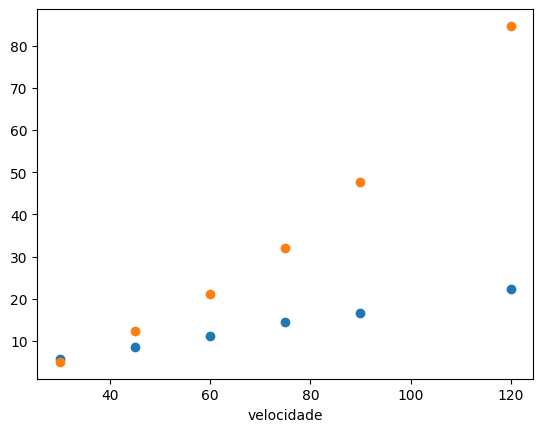

In [ ]:
v = [30, 45, 60, 75, 90, 120]
p = [5.6, 8.5, 11.1, 14.5, 16.7, 22.4]
f = [5.0, 12.3, 21, 32.0, 47.6, 84.7]

plt.scatter(v, p)
plt.scatter(v, f)
plt.xlabel("velocidade")
plt.show()

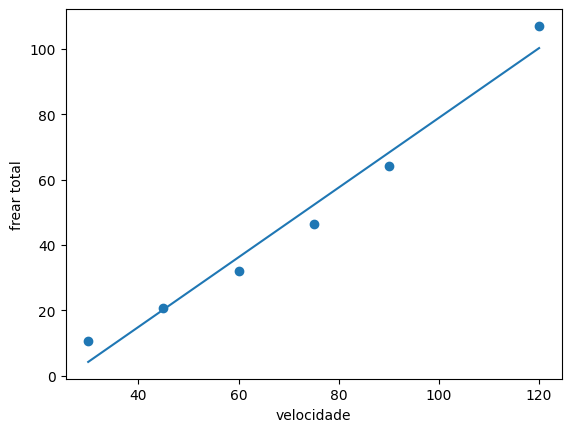

In [ ]:
vf = [sum(x) for x in zip(p, f)]
_, _, a1, a0 = mmq(v, vf)


plt.scatter(v, vf)
plt.plot(v, a1*np.array(v, dtype='float64') + a0)
plt.xlabel("velocidade")
plt.ylabel("frear total")
plt.show()

Utilizando MMQ

In [ ]:
syx, r2, a1p, a0p = mmq(v, p)
print(f'pensar(x) = ({a1p})*Velocidade + {a0p}')
syx, r2, a1f, a0f = mmq(v, f)
print(f'frear(x) = ({a1f})*Velocidade + {a0f}')

pensar(x) = (0.18647619047619024)*Velocidade + 0.08000000000001783
frear(x) = (0.8818095238095234)*Velocidade + -27.959999999999965


Utilizando o Google Sheets para obter a fórmula:

Pensar (m) = 0,1792 * Velocidade - 1,776

Frear (m) = 0,7513 * Velocidade - 1,537

####b

In [ ]:
pm = 0.1792 * 110 - 1.776
fm = 0.7513 * 110 - 1.537

mmq_p = a1p * 110 + a0p
mmq_f = a1f * 110 + a0f

print(f'Utilizando a função obtida do Google Sheets: {pm + fm}')
print(f'Utilizando MMQ: {mmq_p + mmq_f}')

Utilizando a função obtida do Google Sheets: 99.042
Utilizando MMQ: 89.63142857142856


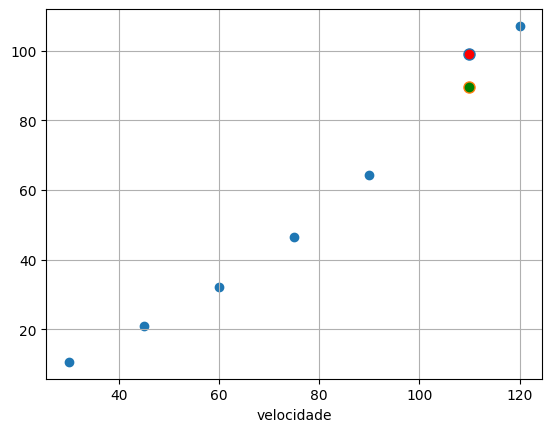

In [ ]:
plt.scatter(v, vf)
plt.xlabel("velocidade")
plt.plot(110, 99.042, marker="o", markersize=8, markerfacecolor="red")
plt.plot(110, 89.63142857142856, marker="o", markersize=8, markerfacecolor="green")
plt.grid()
plt.show()

###4

####a

f(x) = (2.2552857142857086)x + (65.89047619047625)


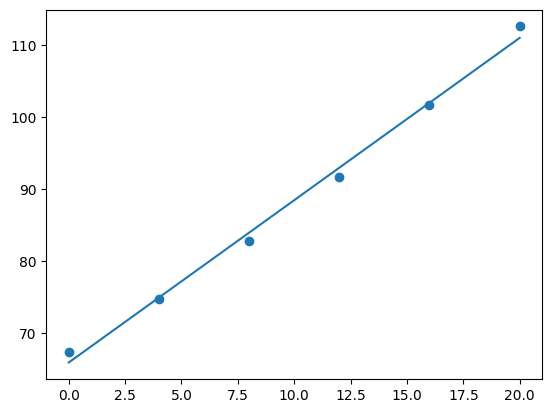

In [ ]:
d = [0, 4, 8, 12, 16, 20]
q = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]

syx, r2, a1, a0 = mmq(d,q)
print(f'f(x) = ({a1})x + ({a0})')

plt.scatter(d, q)
plt.plot(d, a1*np.array(d, dtype='float64') + a0)
plt.show()

####b

#####Linear

f(x) = (2.2552857142857086)x + (65.89047619047625)


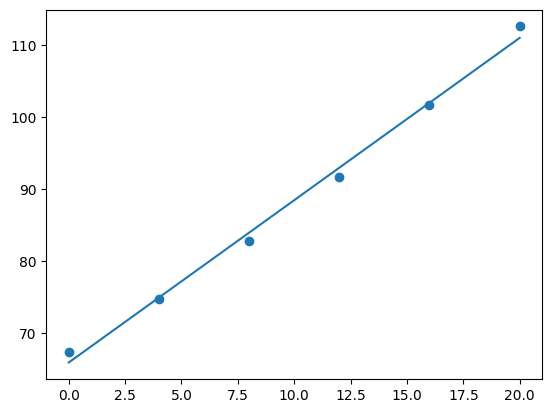

In [ ]:
d = [0, 4, 8, 12, 16, 20]
q = [67.38, 74.67, 82.74, 91.69, 101.60, 112.58]

diferencas = []
t = np.linspace(min(d), max(d), len(d))

syx, r2, a1, a0 = mmq(d,q)
print(f'f(x) = ({a1})x + ({a0})')

k = 0
dif = 0
for i in t:
    ps = a1*i + a0
    dif += abs(q[k] - ps)
    k += 1
diferencas.append(dif)

plt.scatter(d, q)
plt.plot(d, a1*np.array(d, dtype='float64') + a0)
plt.show()

#####Quadrática

f(x) = (0.028805803571430897)x² + (1.6791696428570888)*x + 67.42678571428593


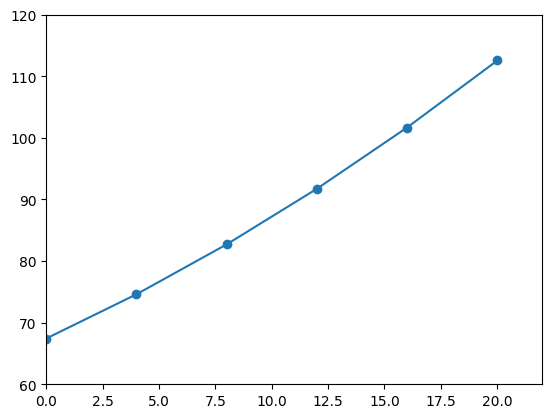

In [ ]:
a0, a1, a2 = mmq_qua(d, q)
print(f'f(x) = ({a0})x² + ({a1})*x + {a2}')

k = 0
dif = 0
for i in t:
    ps = bqua(i, a0, a1, a2)
    dif += abs(q[k] - ps)
    k += 1
diferencas.append(dif)

plt.scatter(d, q)
plt.plot(t, [bqua(i, a0, a1, a2) for i in t])
plt.xlim([0, 22])
plt.ylim([60, 120])
plt.show()

#####Exponencial

f(x) = (67.38252665169892) * e^((0.025665605440044433)*x)


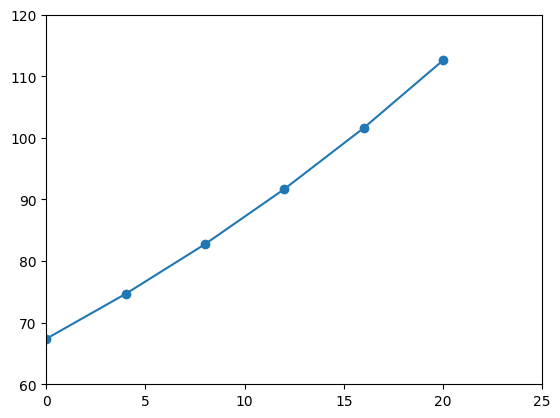

In [ ]:
a0, a1 = mmq_exp(d, q)
print(f'f(x) = ({a0}) * e^(({a1})*x)')

k = 0
dif = 0
for i in t:
    ps = bexp(i, a0, a1)
    dif += abs(q[k] - ps)
    k += 1
diferencas.append(dif)

plt.plot(t, [bexp(i, a0, a1) for i in t])
plt.scatter(d, q)
plt.xlim([0, 25])
plt.ylim([60, 120])
plt.show()

#####Diferenças

In [ ]:
print(f'Vetor das diferenças gerado: {diferencas}')

Vetor das diferenças gerado: [6.146666666666675, 0.29885714285718734, 0.013721429436117205]


Por meio dos gráficos podemos perceber que tanto a regressão quadrática quanto a exponencial tiveram bons resultados quanto a aproximação, porém ao olhar o vetor das diferenças que foi gerado podemos ver que a equação que melhor se ajusta aos dados é a exponencial

####c

In [ ]:
syx, r2, a1, a0 = mmq(d,q)
print(syx)
print(r2)

1.4094600452115056
0.9944513427448027


####d

Como visto na letra **b** desse exercício, a melhor equação é a exponencial

In [ ]:
a0, a1 = mmq_exp(d, q)
result = round(a0 * math.exp(a1 * 30), 2)
print(result)

145.53


###5

In [ ]:
x = [1, 2, 3, 4, 5]
y = [0.5, 2, 2.9, 3.5, 4]

t = np.linspace(min(x), max(x), len(x))

f(x) = (-0.1642857142857151)x² + (1.8357142857142923)*x + -1.1200000000000105


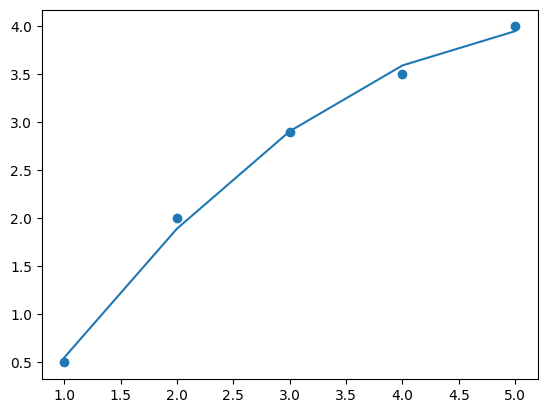

In [ ]:
a0, a1, a2 = mmq_qua(x, y)
print(f'f(x) = ({a0})x² + ({a1})*x + {a2}')

plt.plot(t, [bqua(i, a0, a1, a2) for i in t])
plt.scatter(x, y)

plt.show()

In [ ]:
previsao = 2.6
fx = (a0 * (previsao)**2) + (a1 * previsao) + a2
print(round(fx,2))

2.54
